In [ ]:
! pip install scikit-learn-extra
! pip install kmodes

In [59]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster._kmeans import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
sns.set()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)


In [181]:

data = pd.read_csv("DataByMonths.csv", low_memory = False)
data


,member_noSource,Month_Name,region_noSource,gender,Total
0,63,Juillet,8,0,564.3
1,63,Octobre,8,0,8048.0
2,80,Juin,7,1,437.8
3,80,Septembre,7,1,6208.0
4,83,Juin,5,0,3653.1
...,...,...,...,...,...
55434,10000,Juin,3,1,444849.0
55435,10000,Mai,3,1,104350.4
55436,10000,Mars,3,1,24819.3
55437,10000,Octobre,3,1,217296.0


In [182]:

members_reg_gen = pd.read_csv("members-regions-gender.csv",low_memory=False,sep=';')

df_new = data.pivot(index='member_noSource' ,columns='Month_Name', values='Total').reset_index()
df_new.fillna(0, inplace=True)

df_new

Month_Name,member_noSource,Août,Avril,Juillet,Juin,Mai,Mars,Octobre,Septembre
0,63,0.0,0.0,564.3,0.0,0.0,0.0,8048.0,0.0
1,80,0.0,0.0,0.0,437.8,0.0,0.0,0.0,6208.0
2,83,0.0,0.0,0.0,3653.1,0.0,0.0,0.0,52976.0
3,84,26848.0,0.0,0.0,0.0,1856.8,0.0,0.0,0.0
4,89,0.0,0.0,0.0,1667.6,0.0,0.0,0.0,24096.0
...,...,...,...,...,...,...,...,...,...
9109,9996,756272.0,63930.9,951931.9,241104.9,52202.7,13588.3,362864.0,643344.0
9110,9997,699296.0,92967.6,1365365.6,331394.8,48318.6,19144.4,257056.0,788128.0
9111,9998,1109616.0,53007.9,783980.3,491150.3,76594.1,29543.8,236368.0,913488.0
9112,9999,864512.0,83598.9,1239378.5,293421.6,59677.2,17318.4,401680.0,615136.0


In [183]:

source_mem = df_new['member_noSource']

df_new=  df_new.drop('member_noSource',axis=1)

df_new

Month_Name,Août,Avril,Juillet,Juin,Mai,Mars,Octobre,Septembre
0,0.0,0.0,564.3,0.0,0.0,0.0,8048.0,0.0
1,0.0,0.0,0.0,437.8,0.0,0.0,0.0,6208.0
2,0.0,0.0,0.0,3653.1,0.0,0.0,0.0,52976.0
3,26848.0,0.0,0.0,0.0,1856.8,0.0,0.0,0.0
4,0.0,0.0,0.0,1667.6,0.0,0.0,0.0,24096.0
...,...,...,...,...,...,...,...,...
9109,756272.0,63930.9,951931.9,241104.9,52202.7,13588.3,362864.0,643344.0
9110,699296.0,92967.6,1365365.6,331394.8,48318.6,19144.4,257056.0,788128.0
9111,1109616.0,53007.9,783980.3,491150.3,76594.1,29543.8,236368.0,913488.0
9112,864512.0,83598.9,1239378.5,293421.6,59677.2,17318.4,401680.0,615136.0


In [184]:

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_new)
df = pd.DataFrame(x_scaled)

df['member_noSource'] = source_mem

df

,0,1,2,3,4,5,6,7,member_noSource
0,0.000000,0.000000,0.000413,0.000000,0.000000,0.000000,0.013305,0.000000,63
1,0.000000,0.000000,0.000000,0.000588,0.000000,0.000000,0.000000,0.004987,80
2,0.000000,0.000000,0.000000,0.004907,0.000000,0.000000,0.000000,0.042558,83
3,0.017754,0.000000,0.000000,0.000000,0.017794,0.000000,0.000000,0.000000,84
4,0.000000,0.000000,0.000000,0.002240,0.000000,0.000000,0.000000,0.019357,89
...,...,...,...,...,...,...,...,...,...
9109,0.500106,0.687669,0.697199,0.323893,0.500264,0.281345,0.599910,0.516825,9996
9110,0.462429,1.000000,1.000000,0.445186,0.463042,0.396383,0.424981,0.633136,9997
9111,0.733764,0.570176,0.574191,0.659796,0.734009,0.611702,0.390779,0.733843,9998
9112,0.571683,0.899226,0.907726,0.394174,0.571892,0.358576,0.664083,0.494165,9999


In [185]:
d = pd.merge(df,members_reg_gen,left_on='member_noSource',right_on='member_noSource',how="inner")

d

,0,1,2,3,4,5,6,7,member_noSource,region_noSource,gender
0,0.000000,0.000000,0.000413,0.000000,0.000000,0.000000,0.013305,0.000000,63,8,0
1,0.000000,0.000000,0.000000,0.000588,0.000000,0.000000,0.000000,0.004987,80,7,1
2,0.000000,0.000000,0.000000,0.004907,0.000000,0.000000,0.000000,0.042558,83,5,0
3,0.017754,0.000000,0.000000,0.000000,0.017794,0.000000,0.000000,0.000000,84,2,0
4,0.000000,0.000000,0.000000,0.002240,0.000000,0.000000,0.000000,0.019357,89,4,0
...,...,...,...,...,...,...,...,...,...,...,...
9109,0.500106,0.687669,0.697199,0.323893,0.500264,0.281345,0.599910,0.516825,9996,8,1
9110,0.462429,1.000000,1.000000,0.445186,0.463042,0.396383,0.424981,0.633136,9997,3,0
9111,0.733764,0.570176,0.574191,0.659796,0.734009,0.611702,0.390779,0.733843,9998,3,1
9112,0.571683,0.899226,0.907726,0.394174,0.571892,0.358576,0.664083,0.494165,9999,2,0


In [186]:
lastData=d.copy()

lastData.fillna(0, inplace=True)

lastData = lastData.sort_values(by='member_noSource')

lastData = lastData.drop('member_noSource',axis=1)

lastData



,0,1,2,3,4,5,6,7,region_noSource,gender
0,0.000000,0.000000,0.000413,0.000000,0.000000,0.000000,0.013305,0.000000,8,0
1,0.000000,0.000000,0.000000,0.000588,0.000000,0.000000,0.000000,0.004987,7,1
2,0.000000,0.000000,0.000000,0.004907,0.000000,0.000000,0.000000,0.042558,5,0
3,0.017754,0.000000,0.000000,0.000000,0.017794,0.000000,0.000000,0.000000,2,0
4,0.000000,0.000000,0.000000,0.002240,0.000000,0.000000,0.000000,0.019357,4,0
...,...,...,...,...,...,...,...,...,...,...
9109,0.500106,0.687669,0.697199,0.323893,0.500264,0.281345,0.599910,0.516825,8,1
9110,0.462429,1.000000,1.000000,0.445186,0.463042,0.396383,0.424981,0.633136,3,0
9111,0.733764,0.570176,0.574191,0.659796,0.734009,0.611702,0.390779,0.733843,3,1
9112,0.571683,0.899226,0.907726,0.394174,0.571892,0.358576,0.664083,0.494165,2,0


In [187]:
wcss = []


In [139]:

for i in range(1, 5):
    kPrototypes = KPrototypes(n_clusters=i, random_state=0)
    kPrototypes.fit(lastData,categorical  = [8,9])
    wcss.append(kPrototypes.cost_)


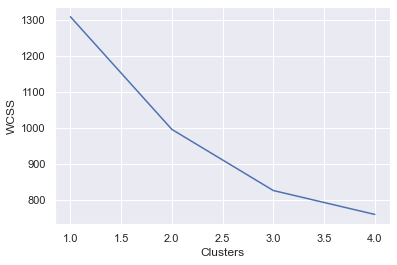

In [141]:
plt.plot(range(1, 5), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [188]:

kPrototypes = KPrototypes(n_clusters=2, random_state=0)
clust = kPrototypes.fit_predict(lastData,categorical  = [8,9])
#kmeans = KMeans(n_clusters=3, random_state=0)
#clust = kmeans.fit_predict(lastData)
d.insert(0, "Cluster", clust, True)


In [189]:

d['member_noSource'] = source_mem

d

,Cluster,0,1,2,3,4,5,6,7,member_noSource,region_noSource,gender
0,0,0.000000,0.000000,0.000413,0.000000,0.000000,0.000000,0.013305,0.000000,63,8,0
1,0,0.000000,0.000000,0.000000,0.000588,0.000000,0.000000,0.000000,0.004987,80,7,1
2,0,0.000000,0.000000,0.000000,0.004907,0.000000,0.000000,0.000000,0.042558,83,5,0
3,0,0.017754,0.000000,0.000000,0.000000,0.017794,0.000000,0.000000,0.000000,84,2,0
4,0,0.000000,0.000000,0.000000,0.002240,0.000000,0.000000,0.000000,0.019357,89,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9109,1,0.500106,0.687669,0.697199,0.323893,0.500264,0.281345,0.599910,0.516825,9996,8,1
9110,1,0.462429,1.000000,1.000000,0.445186,0.463042,0.396383,0.424981,0.633136,9997,3,0
9111,1,0.733764,0.570176,0.574191,0.659796,0.734009,0.611702,0.390779,0.733843,9998,3,1
9112,1,0.571683,0.899226,0.907726,0.394174,0.571892,0.358576,0.664083,0.494165,9999,2,0


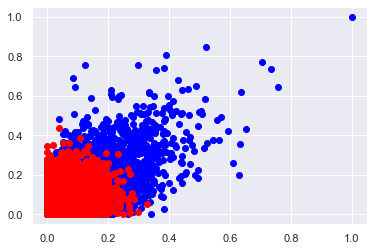

In [202]:
d

x = 0
y = 7

red = d[d["Cluster"] == 0]
blue = d[d["Cluster"]== 1]
black = d[d["Cluster"] == 2]

# Create a scatter plot of the data
plt.scatter(blue[x], blue[y], color='blue')
plt.scatter(red[x], red[y], color='red')

plt.scatter(black[x], black[y], color='black')

# Show the plot
plt.show()

In [ ]:
members = pd.read_csv("Members.csv",low_memory=False)
members = members[['member_noSource','total']].sort_values(by='member_noSource')

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(members[['total']])
df = pd.DataFrame(x_scaled)

df

,0
0,0.001847
1,0.001423
2,0.012197
3,0.006178
4,0.005544
...,...
9109,0.665008
9110,0.776324
9111,0.796171
9112,0.770515
